# Logistic Regression Model

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alinaali/Data_Science_and_Machine_Learning/blob/main/Supervised%20Learning/Logistic_Regression/Logistic_Regression.ipynb)

## Single Neuron Logistic Regression Model
---

<p align="center">
    <img src="logistic_regression.png" width="500">
</p>

---

When we have the probabilistic binary classfication problem. We model this problem as a single neuron model with the binary cross entropy loss function. We will train our neuron with stochastic gradient descent.

## Steps to build a Logistic Regression model

1. Importing the dataset
2. Data pre-processing
3. Single Neuron Model
4. Model Training
5. Predicting & Visualization

## Importing Packages/Libraries

## Data 
The Penguins dataset is used to implement and train this model. 


## Libraries/Packages: 
The first step is to import libraries. 

- Import Numpy
- Import Pandas
- Import Matplotlib
- Import Seaborn
- Import Plot Decision Regions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()


## Importing Dataset

Penguins dataset is being used in this Logistic Regression Model. 

In [2]:
df = pd.read_csv("penguins.csv")
df= df.dropna()
df[150:]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
156,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,male
157,Gentoo,Biscoe,46.5,13.5,210.0,4550.0,female
158,Gentoo,Biscoe,45.4,14.6,211.0,4800.0,female
159,Gentoo,Biscoe,46.7,15.3,219.0,5200.0,male
160,Gentoo,Biscoe,43.3,13.4,209.0,4400.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [3]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


## Data pre-processing

I am saving the penguins dataset into pandas dataframe object so that I can easily work on this dataset.
There are total 334 rows and 7 columns.
The columns includes species, island, bill length, bill depth, flipper length, body mass, and sex.
I will focus on species, bill length, and bill depth columns for this model.

The dataset consists of 7 columns.

- species: penguin species (Adelie, Gentoo, and Chinstrap)
- bill_length_mm: bill length (mm)
- bill_depth_mm: bill depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- island: island name (Dream, Torgersen, or Biscoe)
- sex: penguin sex

I am dropping all the rows that contain NaN values in this Penguins dataset.

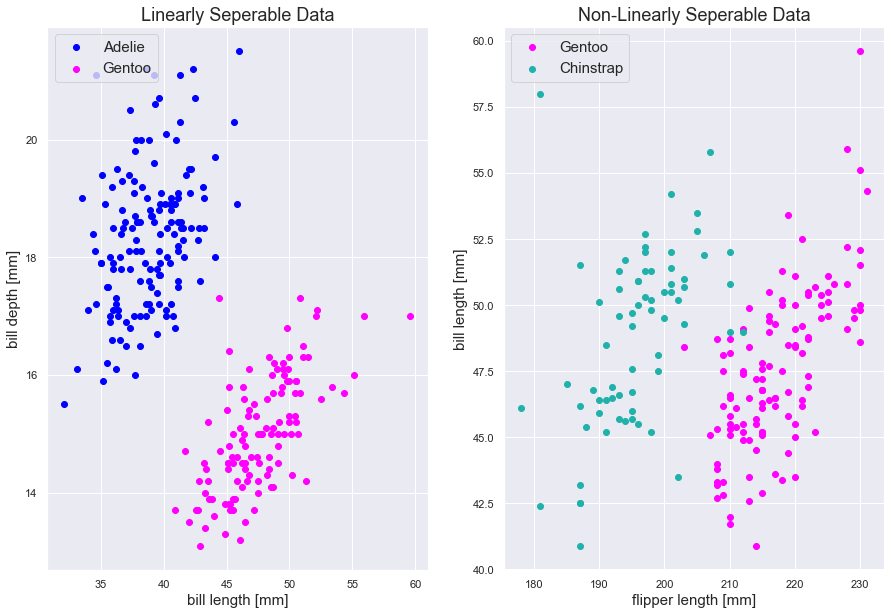

In [1]:
Adelie = df[df.species == "Adelie"]
Gentoo = df[df.species == "Gentoo"]
Chinstrap = df[df.species == "Chinstrap"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(Adelie.bill_length_mm, 
            Adelie.bill_depth_mm, 
            color = "blue", 
            label = "Adelie")
ax1.scatter(Gentoo.bill_length_mm, 
            Gentoo.bill_depth_mm, 
            color = "magenta", 
            label = "Gentoo")
ax1.set_xlabel("bill length [mm]", fontsize = 15)
ax1.set_ylabel("bill depth [mm]", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Linearly Seperable Data", fontsize = 18)




ax2.scatter(Gentoo.flipper_length_mm, 
            Gentoo.bill_length_mm, 
            color = "magenta", 
            label = "Gentoo")
ax2.scatter(Chinstrap.flipper_length_mm, 
            Chinstrap.bill_length_mm, 
            color = "lightseagreen", 
            label = "Chinstrap")
ax2.set_xlabel("flipper length [mm]", fontsize = 15)
ax2.set_ylabel("bill length [mm]", fontsize = 15)
ax2.legend(fontsize = 15, loc = "upper left")
ax2.set_title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()

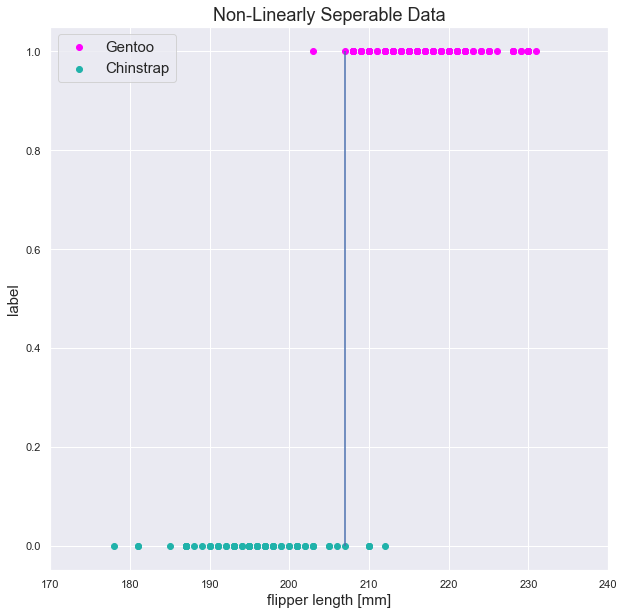

In [2]:
plt.figure(figsize = (10, 10))
plt.xlim((170, 240))

plt.scatter(Gentoo.flipper_length_mm, 
            np.ones(len(Gentoo)),#119 
            color = "magenta", 
            label = "Gentoo")
plt.scatter(Chinstrap.flipper_length_mm, 
            np.zeros(len(Chinstrap)), #265
            color = "lightseagreen", 
            label = "Chinstrap")
plt.vlines(207, 0.0, 1.0)
plt.xlabel("flipper length [mm]", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()

# Logistic Function (Sigmoid Function):

This is the the *sigmoid* activation function:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

- The sigmoid function is a mathematical function used to map the predicted values to probabilities.
- It maps any real value into another value within a range of 0 and 1.
- The value of the logistic regression must be between 0 and 1, which cannot go beyond this limit, so it forms a curve like the "S" form. The S-form curve is called the Sigmoid function or the logistic function.
- In logistic regression, we use the concept of the threshold value, which defines the probability of either 0 or 1. Such as values above the threshold value tends to 1, and a value below the threshold values tends to 0.

# The Single Neuron Model


To build a single neuron model that predicts a class probability. First, we will look at the general single neuron model depicted in the following figure.

---

<p align="center">
    <img src="single_neuron.png" width="500">
</p>

---

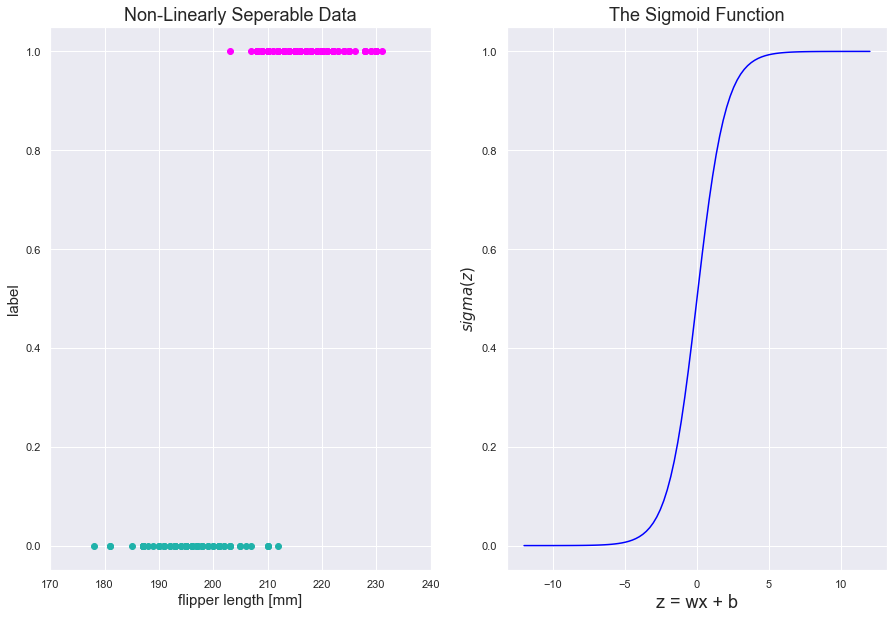

In [3]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.set_xlim((170, 240))
ax1.scatter(Gentoo.flipper_length_mm, 
            np.ones(len(Gentoo)), #119
            color = "magenta", 
            label = "Gentoo")
ax1.scatter(Chinstrap.flipper_length_mm, 
            np.zeros(len(Chinstrap)),  #68
            color = "lightseagreen", 
            label = "Chinstrap")
ax1.set_xlabel("flipper length [mm]", fontsize = 15)
ax1.set_ylabel("label", fontsize = 15)
ax1.set_title("Non-Linearly Seperable Data", fontsize = 18)


domain = np.linspace(-12.0, 12.0, 100)
ax2.plot(domain, 
        sigmoid(domain), 
        color = "blue", 
        label = "$\sigma$(z)")
ax2.set_xlabel("z = wx + b", fontsize = 18)
ax2.set_ylabel("$sigma(z)$", fontsize = 15)
ax2.set_title("The Sigmoid Function", fontsize = 18)
plt.show()

## Single Neuron Model

In [5]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Logistic Regression Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

## The Binary Cross Entropy Loss Function 
Currently we have two target values, 0 for Chinstrap and 1 for Gentoo species. Moreover, we are wishing to predict that *probability of each of these labels given a single feature measurement*. Thus, we encounter the conditional probability function:

$$
P\Big(y^{(i)}\mid x^{(i)}\Big)=\begin{cases}
          \hat{y}^{(i)}, \quad &  y^{(i)} = 1 \\
          1-\hat{y}^{(i)}, \quad & y^{(i)} = 0 \\
     \end{cases}
$$

In [6]:
def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

node = SingleNeuron(sigmoid, cross_entropy_loss)

X = df.iloc[146:].flipper_length_mm.values
max_X = np.max(X)
X = X /max_X
X = X.reshape(-1, 1)
y = np.where(df.iloc[146:].species == "Chinstrap", 0, 1)

node.train(X, y, alpha = 0.05, epochs = 10_000)

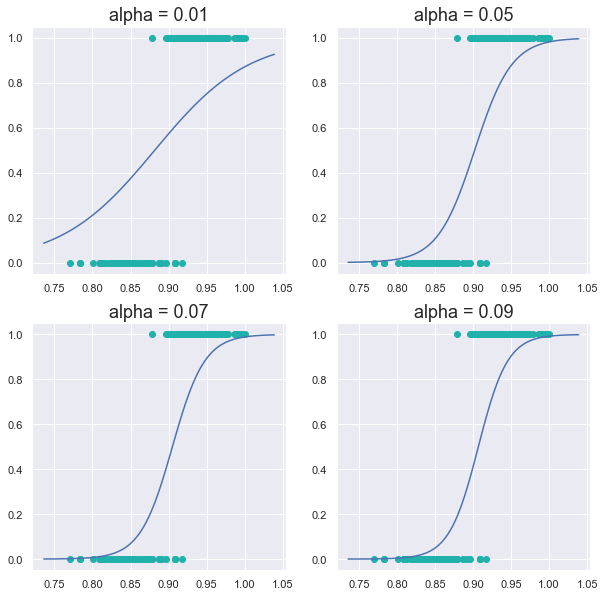

In [43]:
# Possible choices of learning rate 
alphas = [0.01, 0.05, 0.07, 0.09]
domain = np.linspace(170, 240, 100)
domain = domain/max_X
# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    node = SingleNeuron(sigmoid, cross_entropy_loss)
    node.train(X, y, alpha = alpha, epochs = 1_000)
    ax.plot(domain, node.predict(domain.reshape(-1, 1)))
    ax.scatter(X, y, color = "lightseagreen")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)

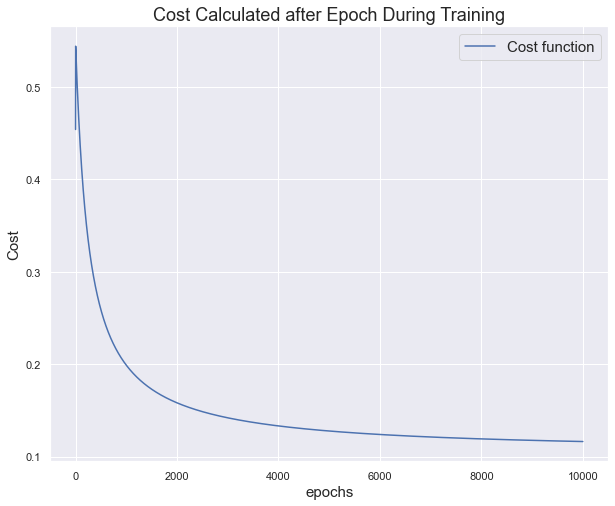

In [7]:
node.plot_cost_function()
plt.show()

# Predicting & Visualization

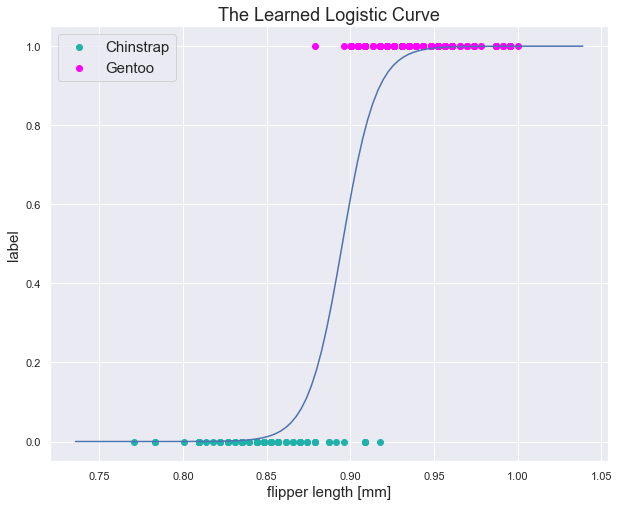

In [8]:
plt.figure(figsize = (10, 8))
#plt.xlim((170, 240))
plt.scatter(Chinstrap.flipper_length_mm/max_X, 
            np.zeros(len(Chinstrap)), #68
            color = "lightseagreen", 
            label = "Chinstrap")
plt.scatter(Gentoo.flipper_length_mm/max_X, 
            np.ones(len(Gentoo)), 
            color = "magenta", 
            label = "Gentoo")
domain = np.linspace(170, 240, 100)
domain = domain/max_X
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("flipper length [mm]", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()



In [9]:
np.rint(node.predict(X)) != y

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [10]:
classification_error = (np.rint(node.predict(X)) != y).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y)}")

Classification Error = 0.03208556149732621


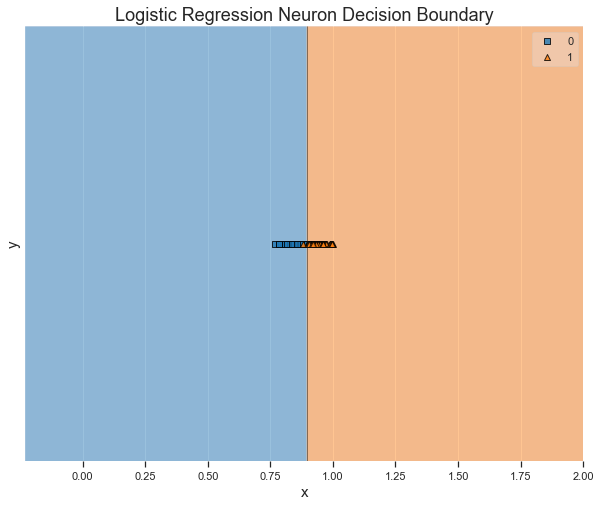

In [11]:
node.plot_decision_boundary(X, y)
plt.show()

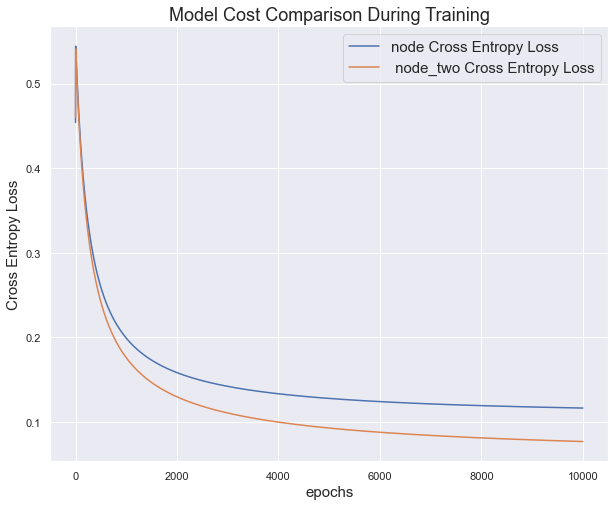

In [12]:
# Instantiate a new single neuron.
node_two = SingleNeuron(sigmoid, cross_entropy_loss)

# Create a numpy.ndarray of flipper length and bill length values for
# the Gentoo and Chinstrap Species, respectively. 
X_two = df.iloc[146:][["flipper_length_mm", "bill_length_mm"]].values
max_X = np.max(X_two)
X = X_two /max_X
# Train the new single neuron model on the new feature vectors.
node_two.train(X, y, alpha = 0.05, epochs = 10_000)


plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         label = "node Cross Entropy Loss")
plt.plot(range(1, len(node_two.errors_) + 1), 
         node_two.errors_,
         label = " node_two Cross Entropy Loss")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("Cross Entropy Loss", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Model Cost Comparison During Training", fontsize = 18)


plt.show()

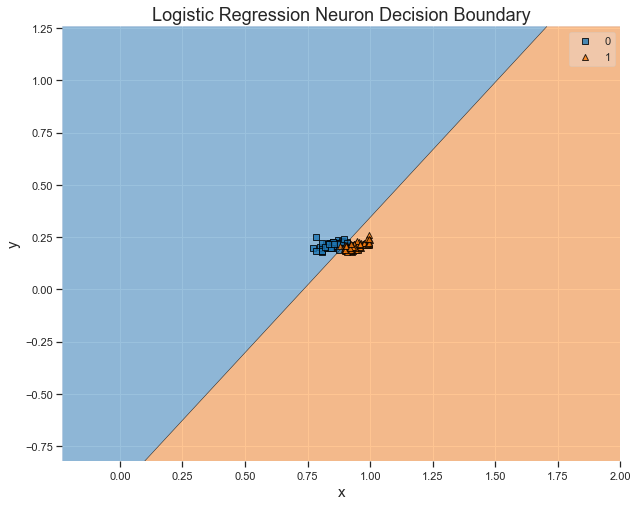

In [13]:
node_two.plot_decision_boundary(X, y)

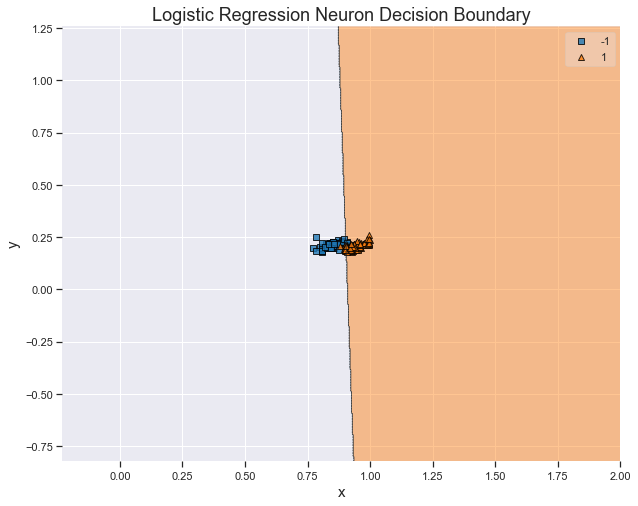

In [15]:
def sign(z):
    return np.sign(z)

def MSE(y_hat, y):
    return .5*(y_hat - y)**2

# Instantiate a new single neuron.
node_three = SingleNeuron(sign, MSE)

# Create a numpy.ndarray of flipper length and bill length values for
# the Gentoo and Chinstrap species, respectively. 
X_three = df.iloc[146:][["flipper_length_mm", "bill_length_mm"]].values
max_X = np.max(X_three)
X = X_three /max_X
y_three = np.where(df.iloc[146:]["species"] == "Chinstrap", -1, 1)
#max_y = np.max(y_three)
#y = y_three /max_y
# Train the new single neuron model on the new feature vectors.
node_three.train(X, y_three, alpha = 0.001, epochs = 5_000)

node_three.plot_decision_boundary(X, y_three)
plt.show()

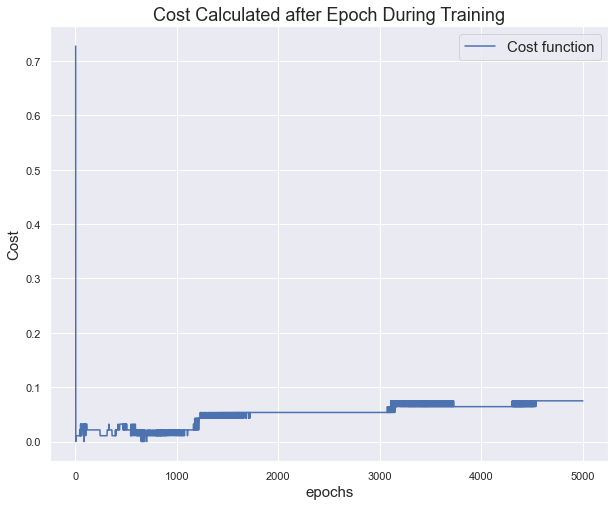

In [16]:
node_three.plot_cost_function()

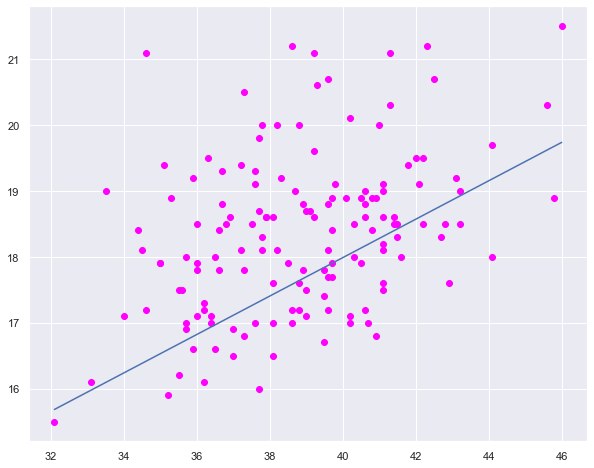

In [17]:
def linear(z):
    return z

# Instantiate a new single neuron.
node_four = SingleNeuron(linear, MSE)

X_four = df.iloc[0:146]["bill_length_mm"].values
X_four = X_four.reshape(-1, 1)

y_four = df.iloc[0:146]["bill_depth_mm"].values


# Train the new single neuron model on the new feature vectors.
node_four.train(X_four, y_four, alpha = 0.001, epochs = 5_000)

plt.figure(figsize = (10, 8))
plt.scatter(X_four, y_four, label = "Adelie", color = "magenta")

domain = np.linspace(np.min(X_four), np.max(X_four), 50)
plt.plot(domain, node_four.predict(domain.reshape(-1, 1)), label = "regression line")
plt.show()